In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
from bmadx import M_ELECTRON
from bmadx.bmad_torch.track_torch import Beam
from beamline import create_6d_diagnostic_beamline
from generate_test_beam import generate_test_beam
from pmd_beamphysics import ParticleGroup
from pytao import Tao

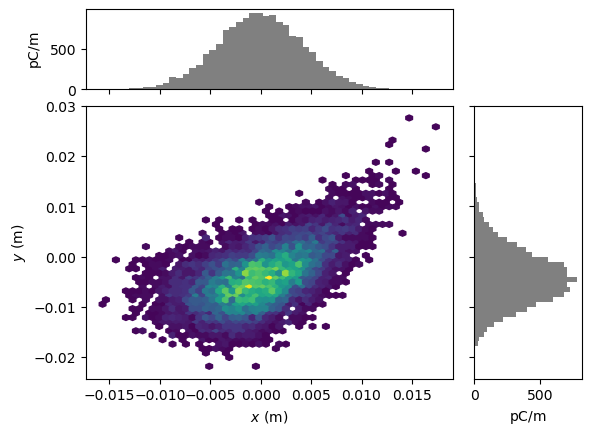

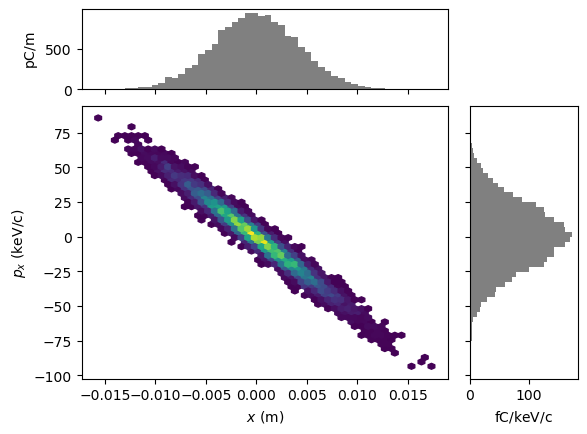

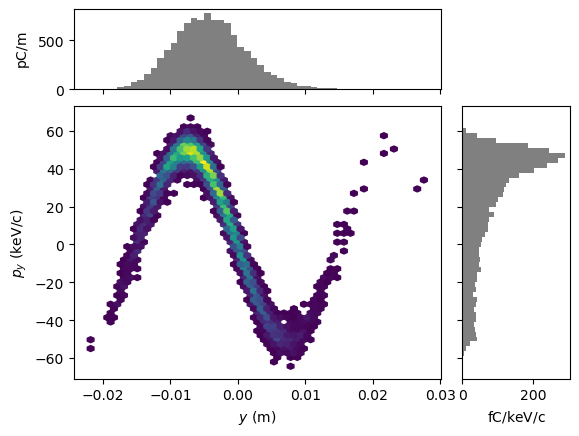

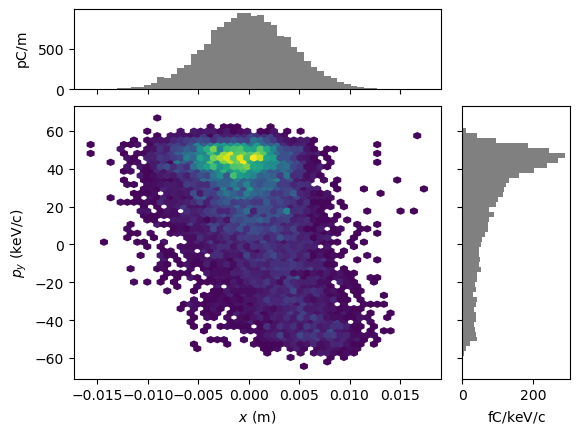

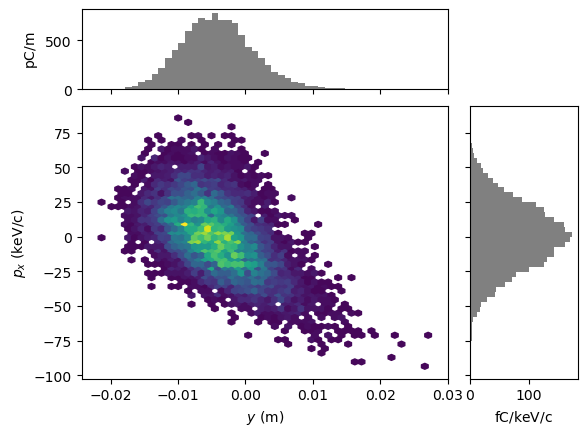

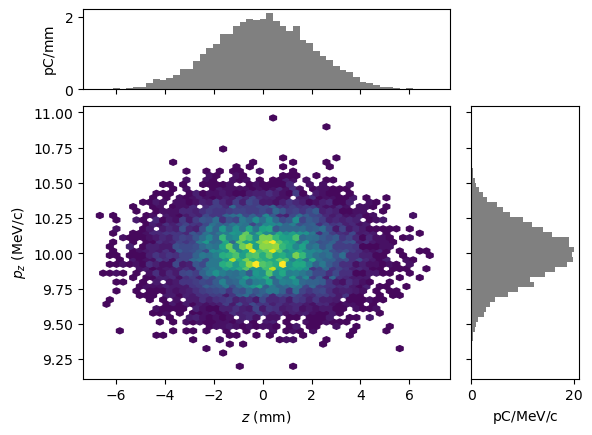

In [3]:
generate_test_beam()

In [4]:
beam_coords = torch.load("ground_truth_dist.pt")

In [5]:
pmd_par = ParticleGroup('pmd_par.h5')

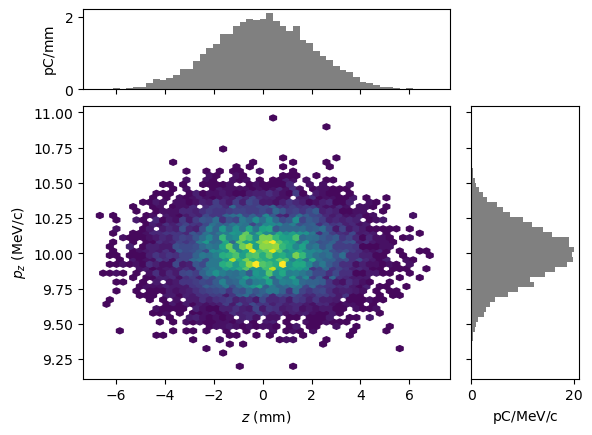

In [6]:
pmd_par.plot('z', 'pz')

In [7]:
# bmad lattice for comparison
tao = Tao('-init tao.init -noplot')  

In [8]:
tao.cmd('set global track_type = beam')

['[WARNING] calc_emittances_and_twiss_from_sigma_matrix:',
 '    Cannot normalize some eigenvectors.',
 '    Note: This can happen if the emittance of a normal mode is very small or zero.',
 '    This will throw off the emittance and other calculations.',
 '[WARNING] calc_emittances_and_twiss_from_sigma_matrix:',
 '    Cannot normalize some eigenvectors.',
 '    Note: This can happen if the emittance of a normal mode is very small or zero.',
 '    This will throw off the emittance and other calculations.',
 '[WARNING] tao_beam_track:',
 '    Beam parameters not computed at: BEGINNING  (0)',
 '    [This will happen with round beams. Ignore this problem if the beam parameters at problem locations are not needed.]',
 '    The singular sigma matrix is:',
 '        1.8000000E-05 -9.9998808E-06  1.3163681E-05 -5.8711080E-06  0.0000000E+00  1.6545054E-06',
 '       -9.9998808E-06  5.7794794E-06 -7.3398526E-06  3.2660969E-06  0.0000000E+00 -9.5874716E-07',
 '        1.3163681E-05 -7.3398526E-0

In [9]:
x_ini = tao.bunch1('beginning', 'x')
px_ini = tao.bunch1('beginning', 'px')
y_ini = tao.bunch1('beginning', 'y')
py_ini = tao.bunch1('beginning', 'py')
z_ini = tao.bunch1('beginning', 'z')
pz_ini = tao.bunch1('beginning', 'pz')

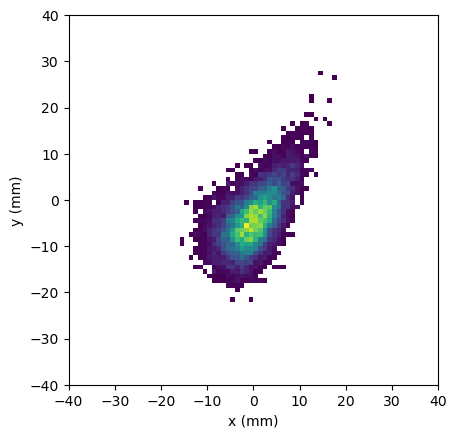

In [10]:
fig, ax = plt.subplots()
mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1 # something tiny
# Bin particles
ax.hist2d(x=1000*x_ini, y=1000*y_ini,  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_aspect('equal')
plt.show()

In [11]:
x_tao = tao.bunch1('end', 'x')
px_tao = tao.bunch1('end', 'px')
y_tao = tao.bunch1('end', 'y')
py_tao = tao.bunch1('end', 'py')
z_tao = tao.bunch1('end', 'z')
pz_tao = tao.bunch1('end', 'pz')

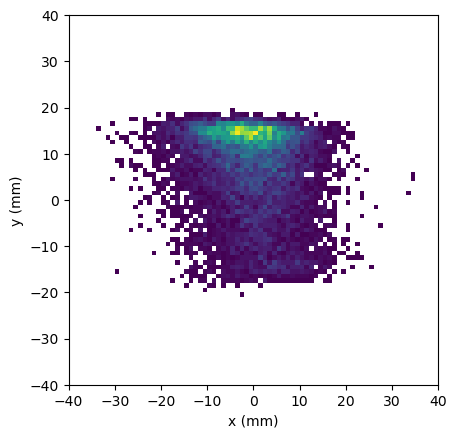

In [12]:
fig, ax = plt.subplots()
mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1 # something tiny
# Bin particles
ax.hist2d(x=1000*x_tao, y=1000*y_tao,  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_aspect('equal')
plt.show()

In [13]:
coords_ini = torch.tensor(np.vstack((x_ini, 
                                     px_ini,
                                     y_ini,
                                     py_ini,
                                     z_ini,
                                     pz_ini)).T)

In [14]:
beam_in = Beam(
    coords_ini,
    s=torch.tensor(0.0),
    p0c=torch.tensor(10.0e6),
    mc2=torch.tensor(M_ELECTRON)
)

In [15]:
lattice = create_6d_diagnostic_beamline()
lattice.elements[0].K1.data = torch.tensor(-5)
beam_out = lattice(beam_in)

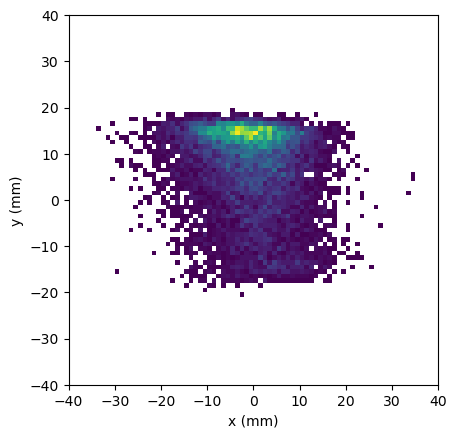

In [16]:
fig, ax = plt.subplots()
mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1 # something tiny
# Bin particles
ax.hist2d(x=1000*beam_out.x.numpy(), y=1000*beam_out.y.numpy(),  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_aspect('equal')
plt.show()

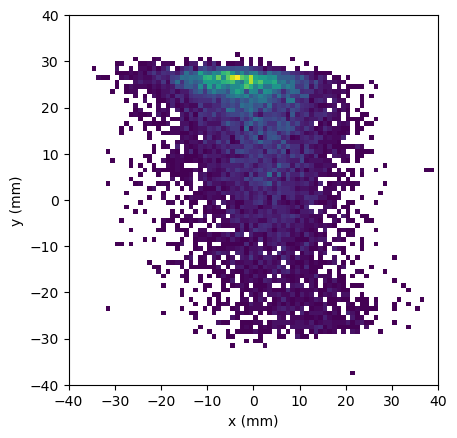

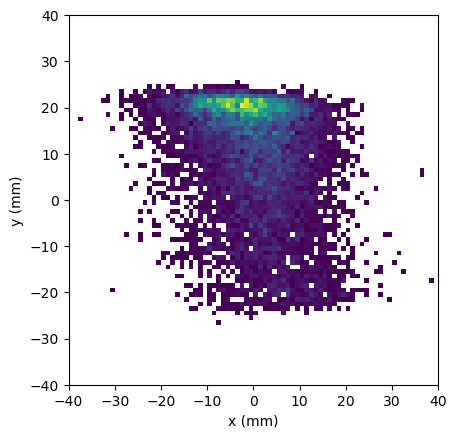

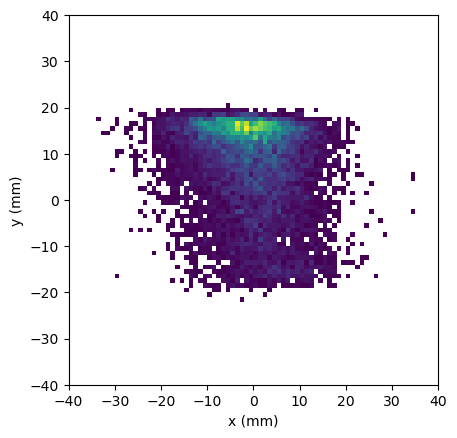

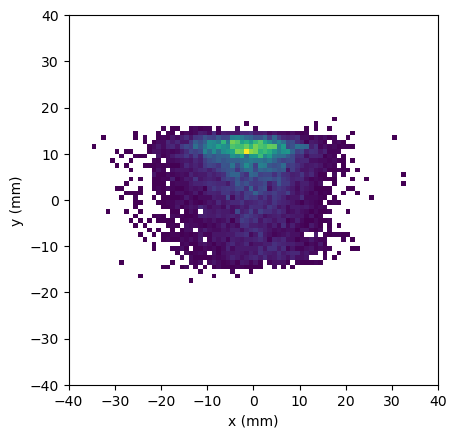

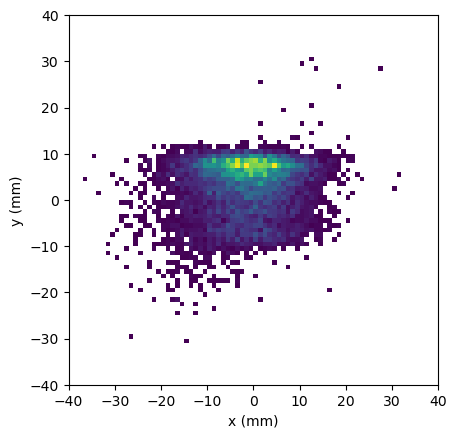

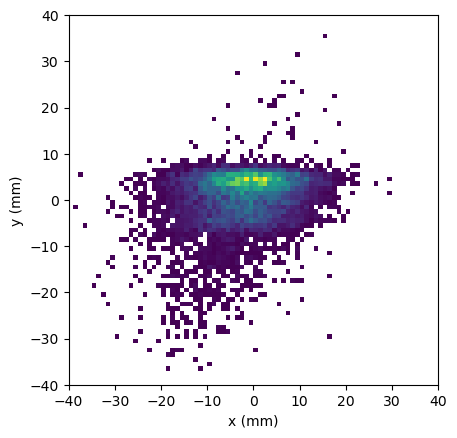

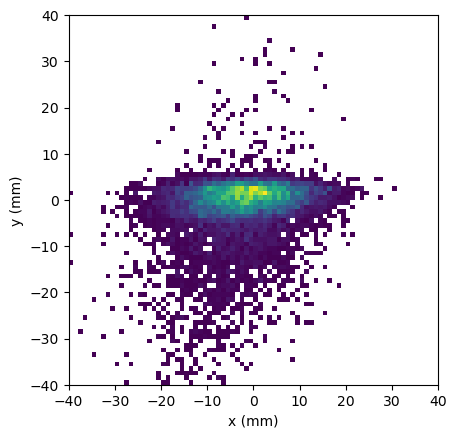

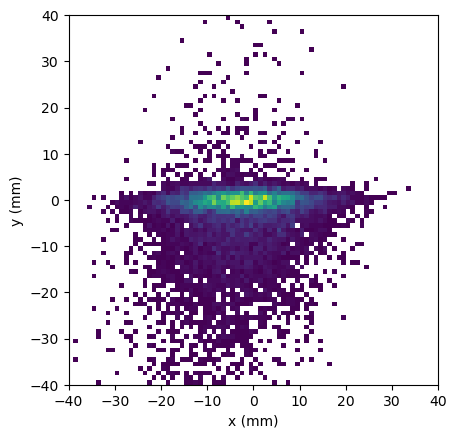

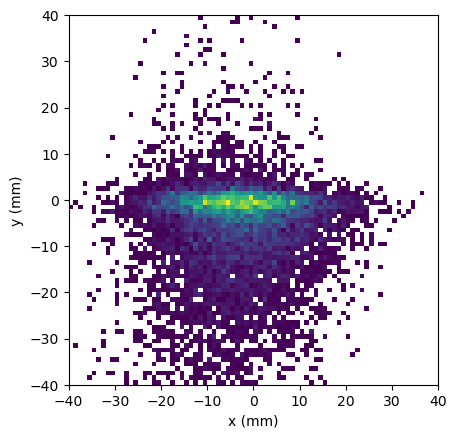

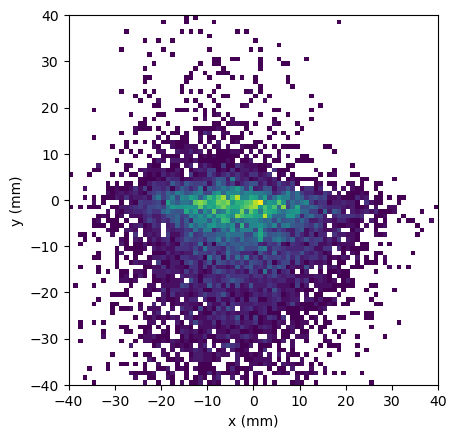

In [17]:
k1s = np.linspace(-10,10,10)
for k1 in k1s:
    lattice.elements[0].K1.data = torch.tensor(k1)
    beam_out = lattice(beam_in)
    fig, ax = plt.subplots()
    mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
    mycmap.set_under(color='white') # map 0 to this color
    myvmin = 1 # something tiny
    # Bin particles
    ax.hist2d(x=1000*beam_out.x.numpy(), y=1000*beam_out.y.numpy(),  bins=[80,80], range=[[-40,40],[-40,40]] ,cmap=mycmap, vmin=myvmin)
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    ax.set_aspect('equal')
    plt.show()

In [18]:
from fitting3 import train_single_model

/home/jp/miniforge3/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


0 tensor(55326484., device='cuda:0', grad_fn=<MulBackward0>)
100 tensor(9034849., device='cuda:0', grad_fn=<MulBackward0>)
200 tensor(6124858.5000, device='cuda:0', grad_fn=<MulBackward0>)
300 tensor(4373923.5000, device='cuda:0', grad_fn=<MulBackward0>)
400 tensor(4912107.5000, device='cuda:0', grad_fn=<MulBackward0>)
500 tensor(4267327.5000, device='cuda:0', grad_fn=<MulBackward0>)
600 tensor(4697417., device='cuda:0', grad_fn=<MulBackward0>)
700 tensor(3896724.5000, device='cuda:0', grad_fn=<MulBackward0>)
800 tensor(3552332., device='cuda:0', grad_fn=<MulBackward0>)
900 tensor(4085074.5000, device='cuda:0', grad_fn=<MulBackward0>)


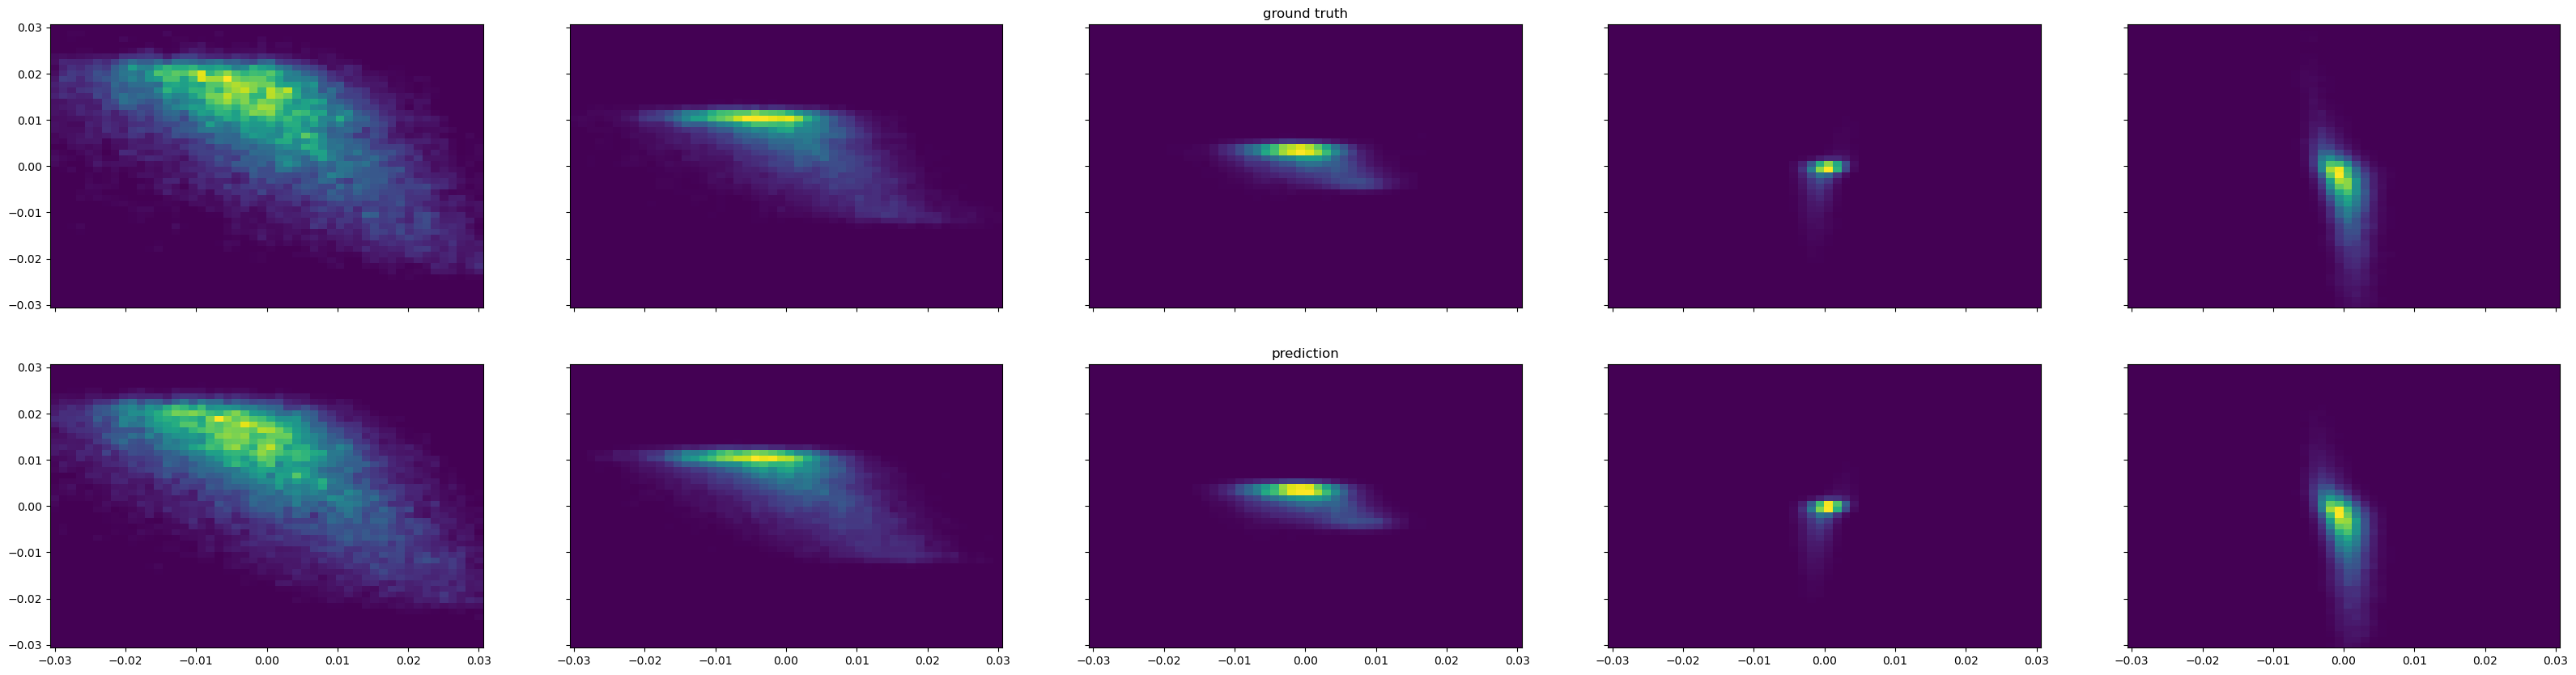

In [19]:
train_single_model()